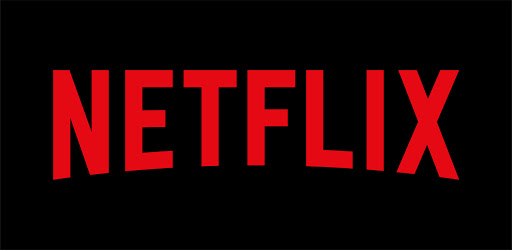

# ***Netflix Data Analysis by VEDANT,JYOTI,SUSHANT***:


# **Importing dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image
import random
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import seaborn as sns
import requests
from nltk.corpus import stopwords

data=pd.read_csv('https://raw.githubusercontent.com/vedant713/Netflix-Data-Analysis/main/netflix_titles.csv')
data_movieimdb=pd.read_csv('https://raw.githubusercontent.com/vedant713/Netflix-Data-Analysis/main/imdbmovies.csv')
data_tvimdb=pd.read_csv('https://raw.githubusercontent.com/vedant713/Netflix-Data-Analysis/main/imdbtv.csv')
data_tv = data[data["type"] == "TV Show"]
data_movies = data[data["type"] == "Movie"]

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# **Getting some basic information about the data**

# Top 5 records of dataset

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Bottom 5 records of dataset

In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8808,s8808,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


# Show number of rows and columns in dataset

In [ ]:
data.shape

(8809, 12)

# Show each column

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Show data type of each column

In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Show indexes,columns,data types of each column at once

In [ ]:
data.info()                                                                                                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6174 non-null   object
 4   cast          7983 non-null   object
 5   country       7977 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


# Task 1:Is there any duplicate record? if present then remove it

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.shape

(8809, 12)

In [ ]:
data[data.duplicated()] #To check row wise and detect duplicate rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8807,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
data.drop_duplicates(inplace=True) #Permanently removes duplicate records for dataset

In [ ]:
data[data.duplicated()] #To check row wise and detect duplicate rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# Is there any null values present in any column? show with heat map

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False
8806,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum() #To show the count of null values in each column

show_id            0
type               0
title              0
director        2635
cast             826
country          832
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Heat Map

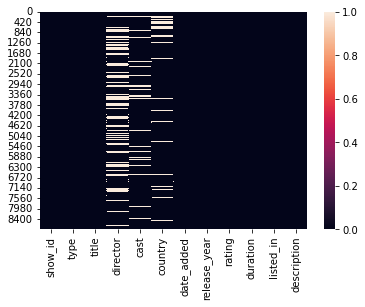

In [ ]:
sns.heatmap(data.isnull()) #Using heatmap null values(NaN) count is displayed

# Q.1)For 'Squid Game',what is the Show Id and who are the cast of this show?

In [ ]:
data[data['title'].isin(['Squid Game'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
33,s34,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...


# Q.2)In which year highest number of TV Shows and movies were released?Show with Bar graph

In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
data['date_n']=pd.to_datetime(data['date_added']) #Adding new column named 'date_n'

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_n
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [ ]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
date_n          datetime64[ns]
dtype: object

In [ ]:
data['date_n'].dt.year.value_counts() #It counts the occurence of all individuals Years in date column

2019.0    2017
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_n, dtype: int64

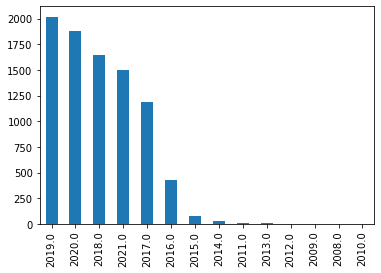

In [ ]:
data['date_n'].dt.year.value_counts().plot(kind='bar')

# Q.3)How many movies and tv shows are in the dataset?Show the bar graph

In [ ]:
data.groupby('type').type.count() #To group all unique items of a column and show their count

type
Movie      6131
TV Show    2677
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


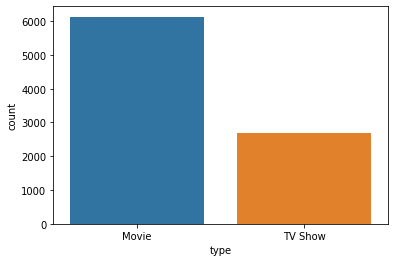

In [ ]:
sns.countplot(data['type'])

# Q.4)Show all the Movies that were released in year 2021

In [ ]:
data['year']=data['date_n'].dt.year #Create new year column 

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_n,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0


In [ ]:
#Perform filtering
data[(data['type']=='Movie')&(data['year']==2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_n,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,s8188,Movie,The American President,Rob Reiner,"Michael Douglas, Annette Bening, Martin Sheen,...",United States,"January 1, 2021",1995,PG-13,113 min,"Comedies, Dramas, Romantic Movies",The widowed president strikes up a romance wit...,2021-01-01,2021.0
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong","January 1, 2021",2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,2021-01-01,2021.0
8320,s8321,Movie,The Girl with the Dragon Tattoo,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","United States, Sweden, Norway","January 5, 2021",2011,R,158 min,"Dramas, Thrillers",When a young computer hacker is tasked with in...,2021-01-05,2021.0
8434,s8435,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",United States,"January 1, 2021",1988,PG-13,85 min,"Comedies, Cult Movies",Hapless cop Frank Drebin causes more problems ...,2021-01-01,2021.0


# Q.5)Show only the titles of all TV shows that were released in India only

In [ ]:
data[(data['type']=='TV Show')&(data['country']=='India')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

# Q.6)Show the geospatial map for content from different countries

In [ ]:
from plotly.offline import iplot 
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
   
def geoplot(ddf):
     
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v
    #country_with_code is a dictionary containing 'COUNTRY CODE':COUNT example 'USA':3689
    data = [dict(
            type = 'choropleth', #choropleth map that uses intensity of color 
            locations = list(country_with_code.keys()),#codes only
            z = list(country_with_code.values()),#z list contains count only 
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(    #changes boundary color of the map
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = 'Legend'),
          ) ]

    layout = dict(
        title = 'Content from different countries',
        geo = dict(
            showframe = True,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator' #Mercator projection is a cylindrical map projection https://gisgeography.com/map-projections/
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map')
    return country
  
country_vals = geoplot(data)




# Q.7)Show the top 10 genre in Movies and Tv Shows

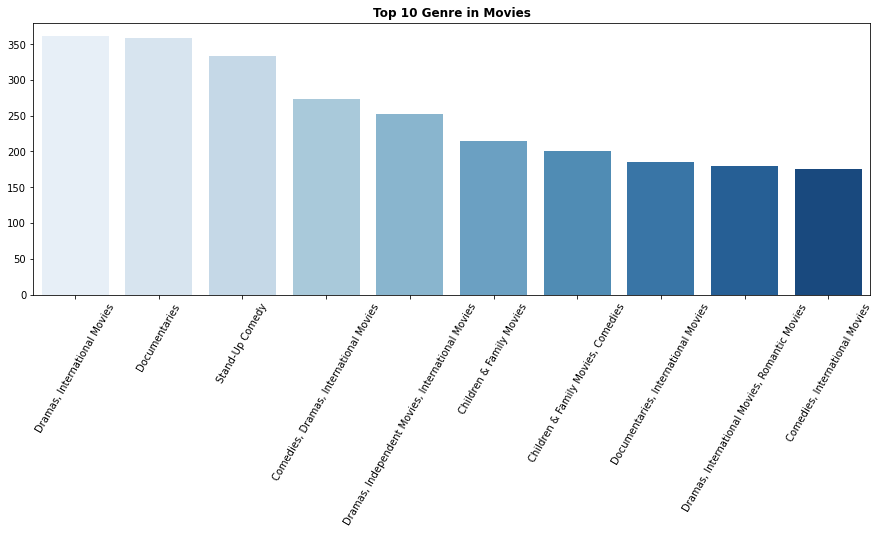

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = data_movies["listed_in"].value_counts().head(10).index,
            y = data_movies["listed_in"].value_counts().head(10).values,palette="Blues")
plt.xticks(rotation=60)#rotate the text to 60 degree to avoid collision in bargraph
plt.title("Top 10 Genre in Movies",fontweight="bold")
plt.show()

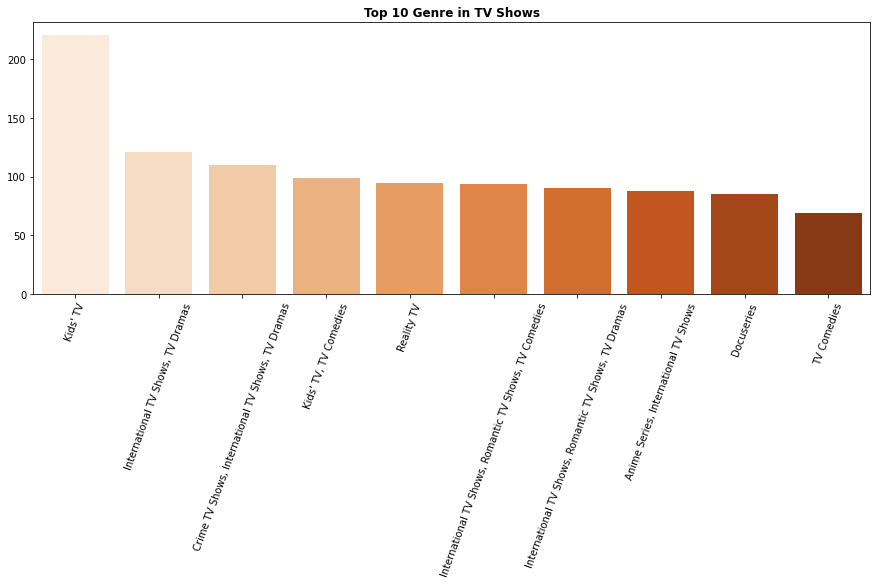

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = data_tv["listed_in"].value_counts().head(10).index,
            y = data_tv["listed_in"].value_counts().head(10).values,palette="Oranges")
plt.xticks(rotation=70) #rotate the text to 70 degree to avoid collision in bargraph
plt.title("Top 10 Genre in TV Shows",fontweight="bold")
plt.show()

# Q.8)Show word cloud for genre in Movies and TV shows
 

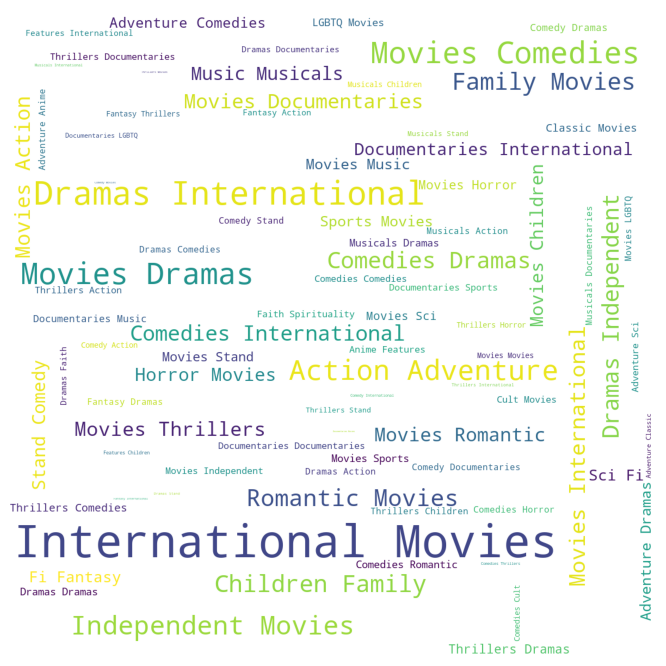

In [ ]:
text = ' '.join(data_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

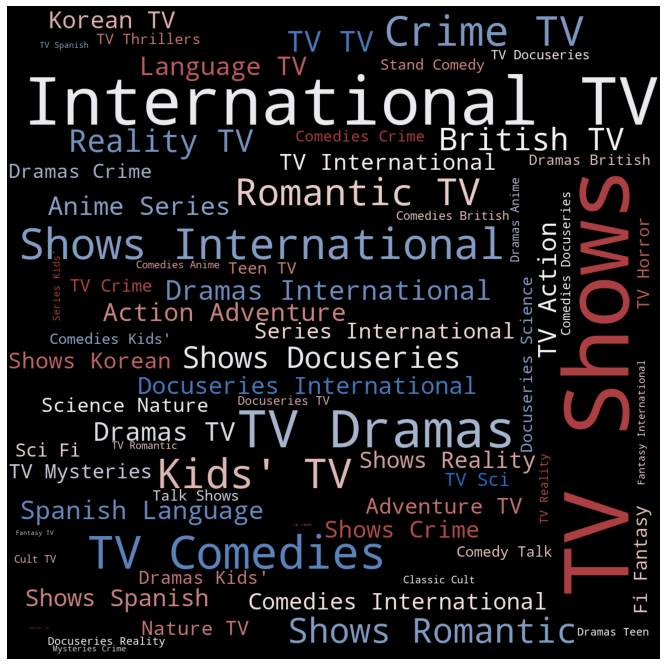

In [ ]:
text = ' '.join(data_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Q.9)Show top 10 casts in movies and TV Shows

In [ ]:
def CastToShowsmapper(df):
    res = [] #list
    for index,row in df.iterrows():
        try:
            for country in row["cast"].split(","):
                res.append([row["show_id"],country.strip()])
        except:
            pass
    #res contains [showid,castname] example ['s2','Ama Qamata']
    res_df = pd.DataFrame(res, columns = ["show_id","cast"]) #forming two columns show_id and cast
    return res_df

shows_castdf = CastToShowsmapper(data)
shows_castdf.head()
combined_show_cast_data = pd.merge(data, shows_castdf, on='show_id')
#combined_show_cast_data.head()

In [ ]:
movie_castfreq = combined_show_cast_data[combined_show_cast_data["type"] == "Movie"]["cast_y"].value_counts()
x = list(movie_castfreq.index)[:10]
y = list(movie_castfreq)[:10]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])
fig.update_layout(
    title = "Top 10 Casts of Movie content in terms of Movies",

    xaxis=dict(
        title_text="cast"
        ),
    yaxis=dict(
        title_text="Total Movies"
        )

)

fig.show()

In [ ]:
tv_show_castfreq = combined_show_cast_data[combined_show_cast_data["type"] == "TV Show"]["cast_y"].value_counts()
x = list(tv_show_castfreq.index)[:10]
y = list(tv_show_castfreq)[:10]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])
fig.update_layout(
    title = "Top 10 Casts of TV Show content in terms of shows",

    xaxis=dict(
        title_text="cast"
        ),
    yaxis=dict(
        title_text="Total Shows"
        )

)

fig.show()

#Q.10)Show treemap for content in India and France

In [ ]:
#Treemap provides a hierarchical view of data and makes it easy to spot patterns
def Treemapcontent(country):
  netflix_in=data[data['country']==country]
  nanremove=netflix_in.dropna() #remove row containing null values
  fig = px.treemap(nanremove, path=['country','director'],
                    color='director', hover_data=['director','title'],color_continuous_scale='Purples')
  fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
  config = dict({'scrollZoom': True})
  fig.show(config=config)


Treemapcontent('France')


In [ ]:
Treemapcontent('India')

#Q.11)Show rating distribution for movies and TV shows

In [ ]:
rating_order_movies =  ['TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = data_movies['rating'].value_counts()[rating_order_movies]
tv_rating = data_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [ ]:

def rating_barplot(data, title, height, h_lim=None):
    #h_lim is the height limit of the graph
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black') #edgecolor represents color of the boundary of bar graph

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]] #Shows the highlighted portion in graph the span(range)

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",  #Set the text little kids,older kids.. in the centre
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.3)#alpha adjusts the intensity of colour

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03)) #Set title of barplot
    plt.show()


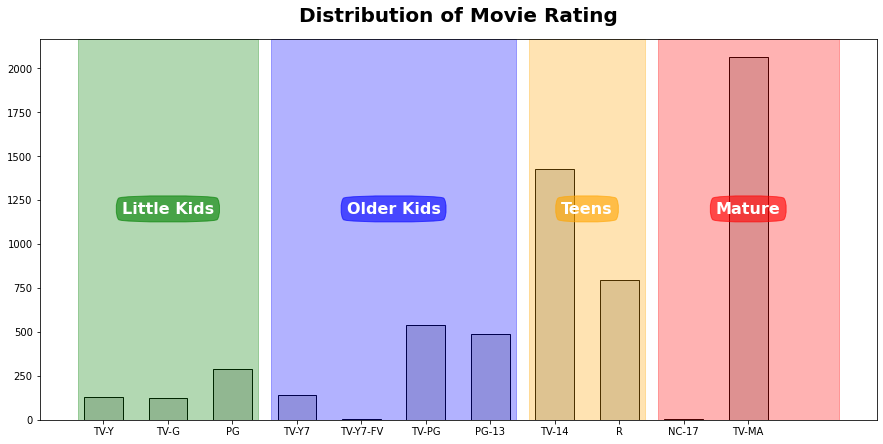

In [ ]:
rating_barplot(movie_rating,'Movie',1200)


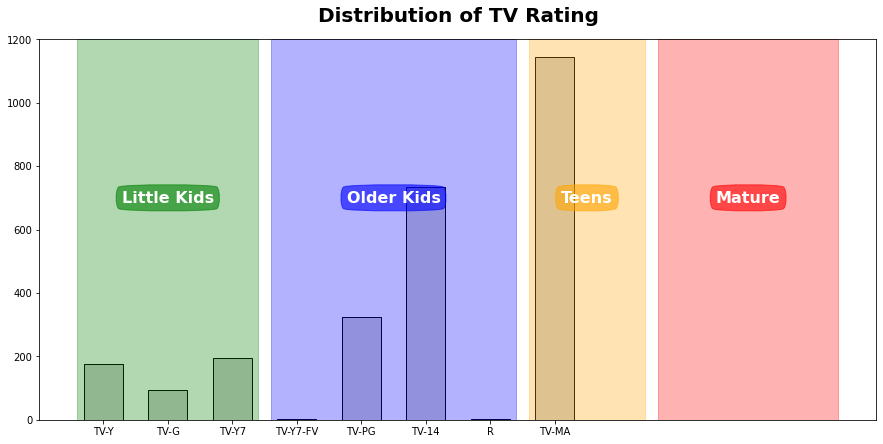

In [ ]:
rating_barplot(tv_rating,'TV', 700,1200)


# Q.12)Show bar plot for Top Duration of movies and TV shows

In [ ]:
topdirs=pd.value_counts(data['duration'])
print(topdirs.index)
print(topdirs.values)
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='royalblue')])
fig.show()

Index(['1 Season', '2 Seasons', '3 Seasons', '90 min', '94 min', '97 min',
       '93 min', '91 min', '95 min', '96 min',
       ...
       '230 min', '253 min', '273 min', '208 min', '5 min', '16 min',
       '186 min', '193 min', '189 min', '191 min'],
      dtype='object', length=220)
[1793  426  199  152  146  146  146  144  137  130  129  122  120  118
  116  116  114  111  108  106  104  103  101  101   98   97   95   87
   80   74   73   69   69   68   67   65   65   65   63   62   61   61
   56   56   54   52   52   48   45   45   44   44   43   42   41   40
   39   38   37   36   35   35   34   33   33   32   32   31   31   31
   30   30   29   28   28   28   28   25   25   25   25   25   24   24
   24   24   23   23   23   23   23   22   22   21   21   20   19   19
   19   18   17   17   16   16   15   15   14   14   13   13   13   13
   13   12   12   12   11   11   11   11   11   11   10   10   10   10
   10   10    9    9    9    9    9    8    8    8    7    7    7    6
 

#Q.13)Show content added over years(2008-2021)for any 10 countries using Line Graph

In [ ]:
def content_over_years(country):

  movie_per_year=[]

  tv_shows_per_year=[]
  for i in range(2008,2022):

    h=data_movies.loc[(data_movies['type']=='Movie') & (data_movies.release_year==i) & (data_movies.country==str(country))] 
    g=data_tv.loc[(data_tv['type']=='TV Show') & (data_tv.release_year==i) &(data_tv.country==str(country))] 
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))



  trace1 = go.Scatter(x=[i for i in range(2008,2022)],y=movie_per_year,mode='lines+markers',name='Movies')

  trace2=go.Scatter(x=[i for i in range(2008,2022)],y=tv_shows_per_year,mode='lines+markers',name='TV Shows')

  data=[trace1,trace2]

  layout = go.Layout(title="Content added over the years in "+str(country), legend=dict(x=0.1, y=1.1, orientation="h"))

  fig = go.Figure(data, layout=layout)

  fig.show()

countries=['India','United States',"Egypt",'France','Spain','Mexico','Japan','South Korea','Canada','Australia']

for country in countries:
    content_over_years(str(country))

# Q.14)Show the monthly content additon to the Netflix Platform

In [ ]:
data_movies['month_added'] = data_movies['date_added'].apply(lambda x: x.split(' ')[0])
content_by_month = data_movies.query('month_added != "No" & month_added != ""')\
.groupby('month_added').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content', ascending = False)

fig = px.pie(labels = content_by_month['month_added'], values = content_by_month['content'], names = content_by_month['month_added'],
            width = 550, height = 550)

colors = ['#6e1919', '#781c1c', '#821f1f', '#871f1f', '#8c2020', '#962121', '#9e2121', '#ab2020', '#b31e1e', '#bf1f1f', '#c91c1c', '#d61818']
fig.update_traces(hoverinfo = 'label + percent', textfont_size = 10,
                  textinfo = 'label + percent', pull = [0.065, 0.06, 0.055, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.015],
                  marker = dict(colors = colors[::-1], line = dict(color = 'white', width = 1)))
fig.update_layout(showlegend = False)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Q.15)Show Movies with the highest IMDb rating and genres using sunburst


In [ ]:
data_movieimdb['IMDb'] = data_movieimdb['IMDb'].str.split('/').str[0]
data_movieimdb['Rotten Tomatoes'] = data_movieimdb['Rotten Tomatoes'].str.split('/').str[0]
data_tvimdb['IMDb'] = data_tvimdb['IMDb'].str.split('/').str[0]
data_tvimdb['Rotten Tomatoes'] = data_tvimdb['Rotten Tomatoes'].str.split('/').str[0]

In [ ]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()
sunburst(data_movieimdb,'Netflix','amp')

# Q.16)What age groups are content created for?

In [ ]:
data['age_group'] = data['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
data['age_group'] = data['age_group'].map(MR_age)

In [ ]:
movie_age_groups = data.query('type == "Movie"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()
tvshow_age_groups = data.query('type == "TV Show"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

fig = px.pie(labels = movie_age_groups['age_group'], values = movie_age_groups['content'], names = movie_age_groups['age_group'], width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Movies', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

####################################################

fig2 = px.pie(labels = tvshow_age_groups['age_group'], values = tvshow_age_groups['content'], names = tvshow_age_groups['age_group'], width = 550, height = 550)

fig2.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f'], 
                                line = dict(color = 'white', width = 2)))

fig2.update_layout(annotations = [dict(text = 'TV Shows', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)

fig2.show()

# Q.17)Show the Distribution of duration across Movies and TV shows in the past years using 3D scatterplot

In [ ]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=data_movies.duration,
    y=data_tv.duration,
    z=data.release_year,
    mode='markers',
    marker_color='darkturquoise'
)

data2 = [trace1]
layout = go.Layout(
)
fig = go.Figure(data=data2, layout=layout)
fig.update_layout(title_text='Distribution of Duration across Movies and TV Show in the past years', title_x=0.5)
iplot(fig)

# Q.18)Show a Custom WordCloud(Netflix logo) for Netflix Titles Description

In [ ]:
import nltk
nltk.download('stopwords')
import wordcloudcustom

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


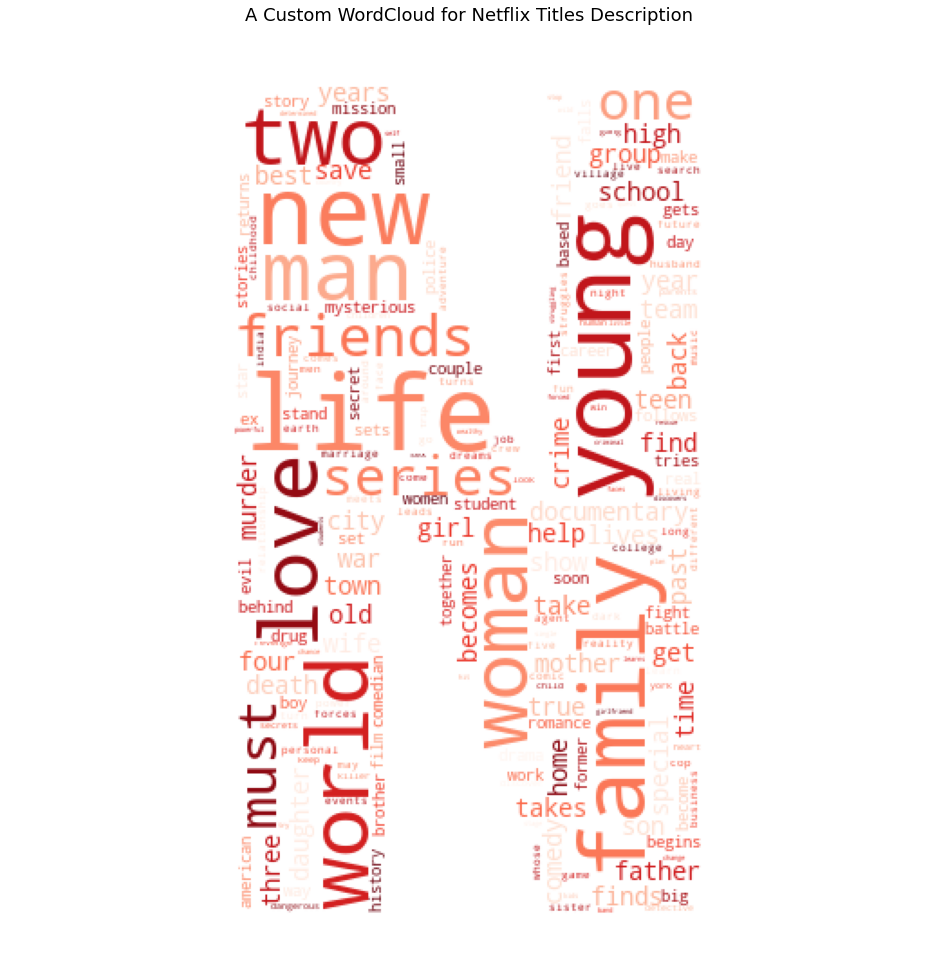

In [ ]:
# Plotting a wordcloud with background image
url_mask = 'https://cdn4.iconfinder.com/data/icons/logos-and-brands-1/512/227_Netflix_logo-512.png'
wordcloudcustom.plot_wordcloud(data['description'], mask=url_mask, colormap='Reds_r',
               title='A Custom WordCloud for Netflix Titles Description')

# Q.19)Perform sentiment analysis of content present in netflix year wise

In [ ]:
from textblob import TextBlob
dfx=data[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()


# Q.20)Show the top 20 content producing countries using bar graph

In [ ]:
temp_df = data['country'].value_counts().reset_index()[:20]


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['country'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 COUNTIES WITH MOST CONTENT' , xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# Recommendation Movies

In [ ]:
#filling null values with empty string 
filledna=data.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_n,year,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,Teens
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,Adults


In [ ]:
#Cleaning the data i.e making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [ ]:
#Creating a "soup" or a "bag of words" for all rows.
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']
filledna['soup'] = filledna.apply(create_soup, axis=1)


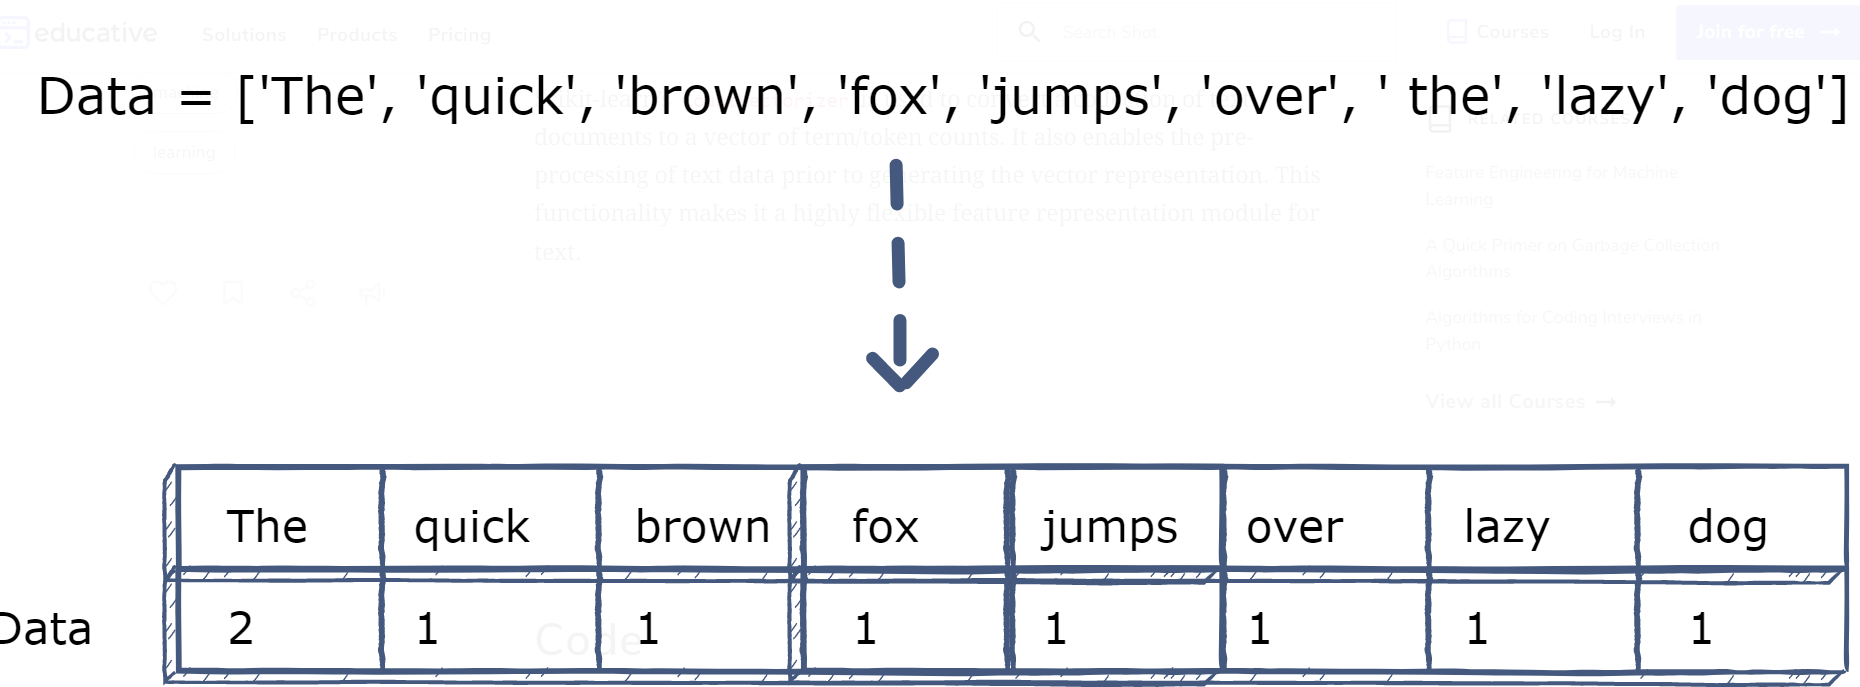

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower() #Remove spaces and make title lower case  
    idx = indices[title] #find index of the title 

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Peaky Blinders',cosine_sim)


3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object